In [1]:
# seeds for reproducibility // everytime we run neural network generates random values so to prevent that we seed it
import numpy as np
np.random.seed(0)

import random
random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshh21","key":"a2ae428b98ebadf82ed5c18961c17cd0"}'}

In [4]:
kaggle_credentials = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.01G/2.04G [00:11<00:00, 182MB/s]
100% 2.04G/2.04G [00:11<00:00, 185MB/s]


In [6]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [7]:
# Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
  zipObj.extractall()

In [8]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

# Number of classes are 38

['color', 'segmented', 'grayscale']
38
['Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Potato___Early_blight', 'Tomato___Early_blight', 'Corn_(maize)___healthy']
38
['Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Potato___Early_blight', 'Tomato___Early_blight', 'Corn_(maize)___healthy']
38
['Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Potato___Early_blight', 'Tomato___Early_blight', 'Corn_(maize)___healthy']


In [9]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['39016e16-a571-46db-8dd9-7c3c165b1f5d___Mt.N.V_HL 8985.JPG', '52bb5946-964f-4dce-a8b8-8c01bdd8737d___Mt.N.V_HL 6078.JPG', 'caf1a7e7-8f7b-4127-929c-7d9c29c31d56___Mt.N.V_HL 8969.JPG', 'fce60e82-c31e-4040-ba92-8dde8410e93f___Mt.N.V_HL 8991.JPG', '0f8906e9-86e1-49f8-aea0-3e887924799d___Mt.N.V_HL 9012.JPG']


In [10]:
# dataset path
base_dir = '/content/plantvillage dataset/color'

(256, 256, 3)


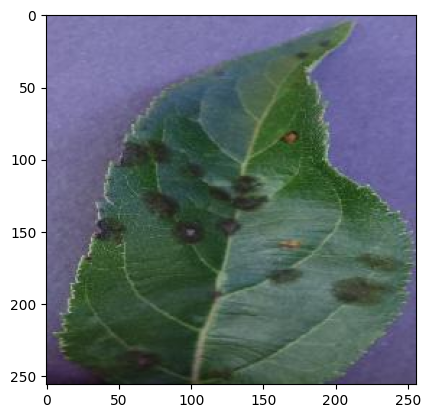

In [11]:
img_path = '/content/plantvillage dataset/color/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'
img = mpimg.imread(img_path)
print(img.shape)

plt.imshow(img)

In [12]:
img_size = 224
batch_size = 32

In [13]:
# Using a pre-trained model - ResNET 50 to get a better performance
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout , BatchNormalization
from tensorflow.keras.models import load_model , Model
from tensorflow.keras import optimizers

In [14]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [15]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
)

Found 43456 images belonging to 38 classes.


In [16]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
)

Found 10849 images belonging to 38 classes.


In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [18]:
# Model Definition
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(38, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
train_samples = len(train_generator.filenames)  # Number of training samples
val_samples = len(validation_generator.filenames)  # Number of validation samples

In [21]:
print("Number of training samples:", train_samples)
print("Number of validation samples:", val_samples)

Number of training samples: 43456
Number of validation samples: 10849


In [22]:
steps_per_epoch = train_samples // batch_size
validation_steps = val_samples // batch_size
print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)

Steps per epoch: 1358
Validation steps: 339


In [34]:
history = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=steps_per_epoch//10,  # Define the number of steps per epoch
    validation_data=validation_generator,
    validation_steps=validation_steps//10  # Define the number of validation steps
)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.8923 - loss: 0.3358 - val_accuracy: 0.8343 - val_loss: 0.5133
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9115 - loss: 0.3078 - val_accuracy: 0.8314 - val_loss: 0.5720
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9009 - loss: 0.3161 - val_accuracy: 0.8371 - val_loss: 0.4933
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9144 - loss: 0.2989 - val_accuracy: 0.8419 - val_loss: 0.5218
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9086 - loss: 0.2782 - val_accuracy: 0.8438 - val_loss: 0.5717


In [35]:
# Evaulating model of validation data
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_steps//10)
print('Validation accuracy:', val_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8549 - loss: 0.5257
Validation accuracy: 0.8399621248245239


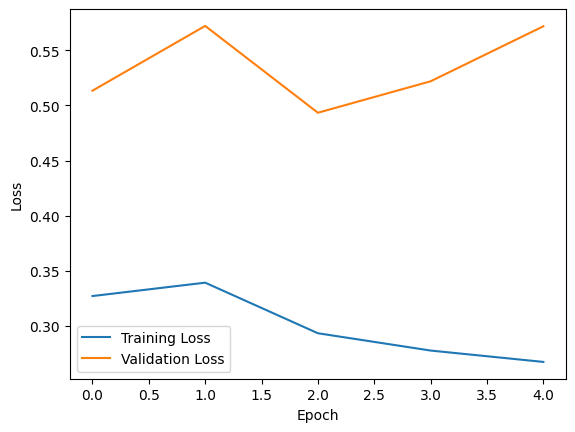

In [36]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

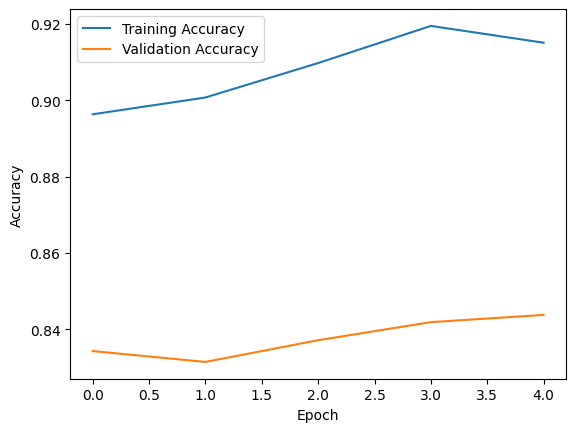

In [37]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((img_size, img_size))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

def predict_image_class(model,image_path,class_indices):
    proceseed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(proceseed_image) # this will give probability value for all 38 classes the one with highest is the actual prob
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [39]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}
# creating a dictionary where k is keys(index) and v are values(class names)

In [40]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [41]:
# saving the class name as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [42]:
# Example Usage
image_path = '/content/plantvillage dataset/color/Peach___healthy/0598c367-7200-4f61-af7b-eddb6bf99e55___Rutg._HL 3737.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Name: Peach___healthy


In [43]:
# saving the model
model.save('plant_disease_prediction.h5')

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning /Plant Disease Prediciton/plant_disease_precition.h5')